In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split


In [ ]:
!wget --no-check-certificate \
    https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
    -O /tmp/rockpaperscissors.zip

--2020-11-03 23:19:23--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  9.39MB/s    in 40s     

2020-11-03 23:20:04 (7.75 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('tmp')
zip_ref.close()

base_dir = 'tmp/rockpaperscissors/rps-cv-images'
train_dir = base_dir
validation_dir = base_dir

In [ ]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    validation_split = 0.4,
                    fill_mode = 'nearest')
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    validation_split = 0.4,
                    fill_mode = 'nearest')

In [ ]:
data_train = train_datagen.flow_from_directory (train_dir,
                                                target_size = (150, 150),
                                                batch_size = 16,
                                                class_mode = 'categorical',
                                                subset = 'training')
data_validation = test_datagen.flow_from_directory (validation_dir,
                                                target_size = (150, 150),
                                                batch_size = 16,
                                                class_mode = 'categorical',
                                                subset = 'validation')

      

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='sigmoid')
])

In [ ]:
from tensorflow.keras import optimizers
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
model.fit(
      data_train,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=20,
      validation_data=data_validation, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # erapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Epoch 1/20
25/25 - 21s - loss: 1.0943 - accuracy: 0.3675 - val_loss: 0.9554 - val_accuracy: 0.6000
Epoch 2/20
25/25 - 21s - loss: 0.6990 - accuracy: 0.6925 - val_loss: 0.4992 - val_accuracy: 0.8375
Epoch 3/20
25/25 - 20s - loss: 0.3602 - accuracy: 0.8650 - val_loss: 0.3177 - val_accuracy: 0.8875
Epoch 4/20
25/25 - 20s - loss: 0.4083 - accuracy: 0.8400 - val_loss: 0.4353 - val_accuracy: 0.8500
Epoch 5/20
25/25 - 20s - loss: 0.3307 - accuracy: 0.8705 - val_loss: 0.2922 - val_accuracy: 0.8750
Epoch 6/20
25/25 - 20s - loss: 0.2482 - accuracy: 0.9050 - val_loss: 0.1238 - val_accuracy: 0.9625
Epoch 7/20
25/25 - 20s - loss: 0.1979 - accuracy: 0.9150 - val_loss: 0.1616 - val_accuracy: 0.9375
Epoch 8/20
25/25 - 20s - loss: 0.1951 - accuracy: 0.9350 - val_loss: 0.2848 - val_accuracy: 0.8875
Epoch 9/20
25/25 - 21s - loss: 0.1818 - accuracy: 0.9525 - val_loss: 0.1807 - val_accuracy: 0.9625
Epoch 10/20
25/25 - 21s - loss: 0.1557 - accuracy: 0.9325 - val_loss: 0.4602 - val_accuracy: 0.9250
Epoch 11/

Saving 0NDYNEoDui7o64gU.png to 0NDYNEoDui7o64gU.png
0NDYNEoDui7o64gU.png
rock


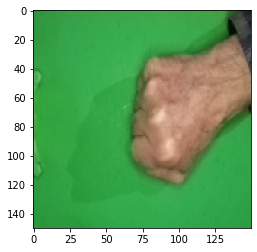

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
    path = fn
    img = image.load_img(path, target_size=(150,150))
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
  
    print(fn)
    if classes [0,0]!=0:
        print('paper')
    elif classes[0,1]!=0:
        print('rock')
    else:
        print('scissors')

Nama: Ayu Titan Damayanti
Username: ayu_titan_damayanti_nkpS
Pendidikan terakhir: Sarjana sains